<a href="https://colab.research.google.com/github/grwgabriel/E.B.A---Curso-Estat-stica/blob/main/Aula_1_Resolu%C3%A7%C3%A3o_Desafio_Ifood_Estat%C3%ADstica_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Desafio Ifood - Estatística Descritiva*


## Sobre o desafio


O conjunto de dados é composto por clientes da empresa Ifood com dados sobre:

* Perfis de clientes
* Preferências do produto
* Sucessos/fracassos da campanha
* Desempenho do canal

O objetivo de hoje é fazer uma análise exploratória desses dados.

* Quantos dados temos? Linhas e colunas
* Quais são as colunas numéricas?
* Temos duplicados na nossa base? Se tivermos, retire-os
* Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?
* Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?

Vamos agora entender o perfil de clientes que temos:

* Qual é o maior salário encontrado na nossa base? Veja na coluna Income
* Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem? Veja na coluna Income
* Nossos clientes tem níveis de educação maiores ou menores? Veja na coluna education_level
* Quantos clientes temos em cada estado civil? Veja na coluna marital_status

Agora vamos ver como os dados se correlacionam:

* Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos? Filhos está na coluna kids
* As pessoas gastam mais ou menos em nossa plataforma quando têm filhos? Veja nas colunas expenses e kids
* Pessoas que têm um maior salário gastam mais? Veja nas colunas Income e expenses

## Conhecendo os dados

In [ ]:
#Importando Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [5, 3]

In [ ]:
#Lendo o arquivo
df = pd.read_excel('mkt_data.xlsx')
df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses,Unnamed: 44,Unnamed: 45
0,0,58138,0,0,58,635,88,546,172,88,...,NaN,1529,1441,0,Single,Graduation,0,1529,Graduation,1113.000000
1,1,46344,1,1,38,11,1,6,2,1,...,NaN,21,15,0,Single,Graduation,2,21,PhD,476.000000
2,2,71613,0,0,26,426,49,127,111,21,...,NaN,734,692,0,Together,Graduation,0,734,NaN,NaN
3,3,26646,1,0,26,11,4,20,10,3,...,NaN,48,43,0,Together,Graduation,1,48,NaN,0.504762
4,4,58293,1,0,94,173,43,118,46,27,...,5.0,407,392,0,Married,PhD,1,407,NaN,0.215873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223,0,1,46,709,43,182,42,118,...,NaN,1094,847,0,Married,Graduation,1,1094,NaN,NaN
2201,2201,64014,2,1,56,406,0,30,0,0,...,5.0,436,428,1,Together,PhD,3,436,NaN,NaN
2202,2202,56981,0,0,91,908,48,217,32,12,...,NaN,1217,1193,1,Divorced,Graduation,0,1217,NaN,NaN
2203,2203,69245,0,1,8,428,30,214,80,30,...,NaN,782,721,0,Together,Master,1,782,NaN,NaN


In [ ]:
#Verificando os tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   int64  
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

Colunas Numéricas: int64 ou float64 -
Colunas Categóricas: object

In [ ]:
#Verificando se existem valores duplicados
df.duplicated().sum()

0

In [ ]:
#Verificando se existem valores nulos
df.isnull().sum()

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

Como podemos ver existem vários valores nulos em algumas colunas do nosso dataframe. Vamos tentar descobrir o motivo e verificar se podemos tratar esses valores.

In [ ]:
colunas_nulos = df[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow',
                    'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']]
for coluna in colunas_nulos:
  print(df[coluna].value_counts())

1.0    230
Name: marital_Divorced, dtype: int64
5.0    854
Name: marital_Married, dtype: int64
4.0    477
Name: marital_Single, dtype: int64
3.0    568
Name: marital_Together, dtype: int64
2.0    76
Name: marital_Widow, dtype: int64
1.0    198
Name: education_2n Cycle, dtype: int64
2.0    54
Name: education_Basic, dtype: int64
3.0    1113
Name: education_Graduation, dtype: int64
4.0    364
Name: education_Master, dtype: int64
5.0    476
Name: education_PhD, dtype: int64


As colunas possuem somente um valor preenchido, isso nos mostra que provavelmente essas colunas deveriam ser booleanas. Portanto, vamos fazer esse tratamento.

In [ ]:
for item in colunas_nulos:
  df[item] = np.where(df[item].isnull(),0,1)
df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses,Unnamed: 44,Unnamed: 45
0,0,58138,0,0,58,635,88,546,172,88,...,0,1529,1441,0,Single,Graduation,0,1529,Graduation,1113.000000
1,1,46344,1,1,38,11,1,6,2,1,...,0,21,15,0,Single,Graduation,2,21,PhD,476.000000
2,2,71613,0,0,26,426,49,127,111,21,...,0,734,692,0,Together,Graduation,0,734,NaN,NaN
3,3,26646,1,0,26,11,4,20,10,3,...,0,48,43,0,Together,Graduation,1,48,NaN,0.504762
4,4,58293,1,0,94,173,43,118,46,27,...,1,407,392,0,Married,PhD,1,407,NaN,0.215873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223,0,1,46,709,43,182,42,118,...,0,1094,847,0,Married,Graduation,1,1094,NaN,NaN
2201,2201,64014,2,1,56,406,0,30,0,0,...,1,436,428,1,Together,PhD,3,436,NaN,NaN
2202,2202,56981,0,0,91,908,48,217,32,12,...,0,1217,1193,1,Divorced,Graduation,0,1217,NaN,NaN
2203,2203,69245,0,1,8,428,30,214,80,30,...,0,782,721,0,Together,Master,1,782,NaN,NaN


##Análise Descritiva

In [ ]:
#Verificando a média,mediana, quartis, mínimo e máximo das colunas
df.describe()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses,Unnamed: 45
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,4.000000
mean,1102.000000,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,...,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932,0.948753,562.764626,397.430159
std,636.672993,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,...,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044,0.749231,575.936911,527.112378
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000,0.000000,4.000000,0.215873
25%,551.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000,0.000000,56.000000,0.432540
50%,1102.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,...,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000,1.000000,343.000000,238.252381
75%,1653.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,...,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000,1.000000,964.000000,635.250000
max,2204.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000,3.000000,2491.000000,1113.000000


In [ ]:
#Maior salário da tabela
df.Income.max()

113734

###Distribuição de salário

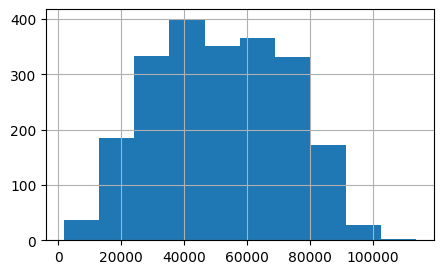

In [ ]:
df.Income.hist();

<Axes: >

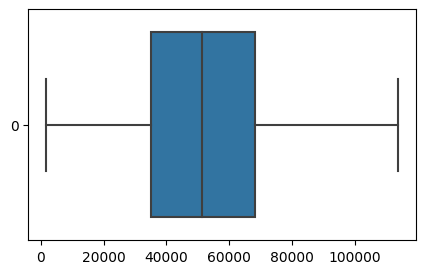

In [ ]:
sns.boxplot(df['Income'],orient="h")

In [ ]:
#Coeficiente de Variação (CV)
df['Income'].std()/df['Income'].mean()

0.4012441554786958

O salário dos clientes parecem bem distribuido em nossos dados. O histograma apresenta uma curva simétrica e nosso boxplot não apresenta nenhum outlier. Então, com esses gráficos é possível identificar que poucas pessoas ganham um salário baixo e poucas pessoas ganham um salário alto.
Porém, o Coeficinte de variação está em 40%, nos mostrando que muitos dados se afastam da média.

###Nível de educação dos clientes

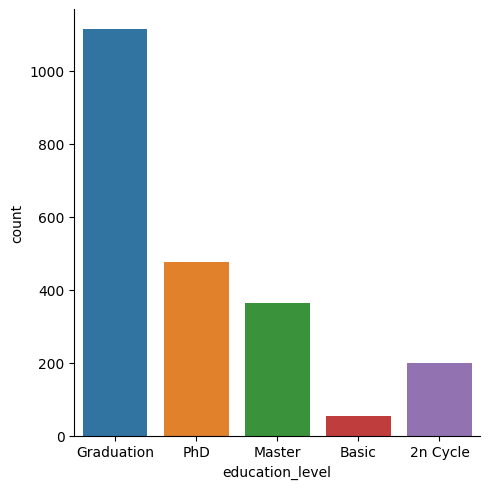

In [ ]:
sns.catplot(data=df,x='education_level',kind='count')

A maioria dos nossos clientes possuem um nível de educação superior.

###Estado civil dos clientes

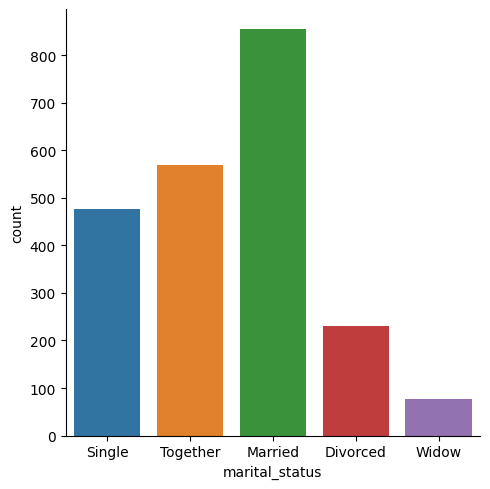

In [ ]:
sns.catplot(data=df,x='marital_status',kind='count')

A maioria dos clientes são casados ou moram juntos.

###Relação do estado civil com número de filhos

<Axes: xlabel='marital_status', ylabel='kids'>

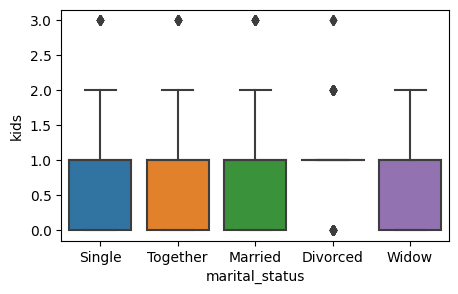

In [ ]:
sns.boxplot(data=df,x='marital_status',y='kids')

In [ ]:
df.groupby(df['marital_status'])['kids'].describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,230.0,1.008696,0.741716,0.0,1.0,1.0,1.0,3.0
Married,854.0,0.967213,0.732019,0.0,0.0,1.0,1.0,3.0
Single,477.0,0.859539,0.777289,0.0,0.0,1.0,1.0,3.0
Together,568.0,0.980634,0.749823,0.0,0.0,1.0,1.0,3.0
Widow,76.0,0.881579,0.747745,0.0,0.0,1.0,1.0,2.0


Para tirar alguma conclusão aqui precisariamos realizar um teste de hipótese, pois todos os números apresentados são muito próximos em cada estado civil.

###Relação com valor gasto na plataforma com número de filhos

<Axes: xlabel='kids', ylabel='expenses'>

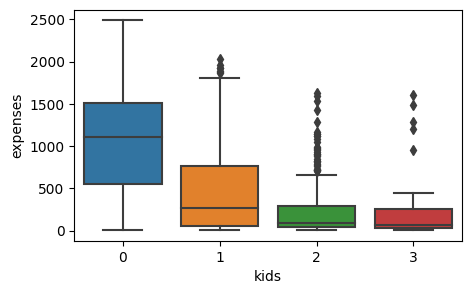

In [ ]:
sns.boxplot(data=df,y='expenses',x='kids')

In [ ]:
df.groupby(df['kids'])['expenses'].describe()

,count,mean,std,min,25%,50%,75%,max
kids,,,,,,,,
0,628.0,1041.207006,625.734894,5.0,546.00,1106.5,1505.50,2491.0
1,1112.0,434.530576,452.606603,4.0,50.00,264.0,762.25,2036.0
2,415.0,221.568675,290.259678,8.0,39.00,84.0,296.50,1627.0
3,50.0,237.380000,390.174157,6.0,28.25,62.0,254.00,1601.0


In [ ]:
df.groupby('kids')['expenses'].median()

kids
0    1106.5
1     264.0
2      84.0
3      62.0
Name: expenses, dtype: float64

Nessa amostra de dados, podemos ver que a média e mediana de 0 e 1 filho é maior do que o restante. Podemos notar também a média bem maior do que a mediana em 2 e 3 filhos, indicando que existem outliers puxando nossa média para cima (O que já foi indicado no boxplot).

###Pessoas que têm um maior salário gastam mais?

<Axes: xlabel='Income', ylabel='expenses'>

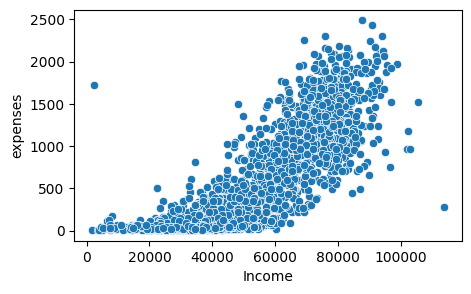

In [ ]:
sns.scatterplot(data=df,x='Income',y='expenses')

In [ ]:
df['expenses'].corr(df['Income'])

0.8230660021398378

Com o gráfico de dispersão e a correlação de Pearson podemos ver que existe uma correlação forte entre essas variáveis, indicando que pessoas que ganham mais gastam mais.